In [34]:
import tweepy

from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
Consumer_Key = "lpqZtaklhRnYqJtyiuMQlHILw"
Consumer_Secret_Key = "6ItvE77UqnyK6m4vJW0ZhjWrkBnWQ35ZHWF9jQ2HuwoMRdwXko"
Access_Token ="1258105276969783296-87sFfqJrDlWwnVHUuOf6rp9LBOyjpW"
Access_Token_Secret = "NQa9iRDJ2LE5aR0OMQnUwesOruJFDNFNT8ymyequCkE2K"

In [36]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [40]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [41]:
posts = api.user_timeline(screen_name="kumparan", count = 1000, lang ="en", tweet_mode="extended")
#  Print the last 5 tweets
print("Show the 200 recent tweets:\n") 
i=1
for tweet in posts[:200]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 200 recent tweets:

1) Tercatat ada 150 ribu dosis vaksin Pfizer di Jerman pada hari pertama vaksin. Sementara pada akhir 2020, ada 1,3 juta vaksin yang dipesan oleh negara yang dipimpin Kanselir Angela Merkel. https://t.co/pZfQnkkv3E

2) Pemerintah dan Kapolri meminta masyarakat tidak menyebarluaskan konten FPI di media sosial. Namun, eks Ketua MK, Hamdan Zoelva, menilai tak ada ketentuan pidana soal larangan tersebut. #kumparanNEWS https://t.co/u8rnlsdAUo

3) Tokoh masyarakat terpilih atau tokoh kesehatan di Jambi akan divaksinasi pada tahap pertama ini. #publisherstory https://t.co/1R0JMCyeqY

4) Satgas Pamtas Yonif RK 744/SBY menggagalkan penyelundupan sebanyak 125 kg kayu cendana dan kembang api ke negara Timor Leste. #publisherstory https://t.co/GKnGpdKBi3

5) Keterisian tempat tidur isolasi harian (ruang rawat inap) maupun ruang ICU di 98 RS Rujukan Corona di DKI Jakarta meningkat. #kumparanNEWS https://t.co/PtC3BBpQiP

6) Kasus aktif corona di Jakarta jadi perhatian. T

In [42]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Tercatat ada 150 ribu dosis vaksin Pfizer di J...
1,Pemerintah dan Kapolri meminta masyarakat tida...
2,Tokoh masyarakat terpilih atau tokoh kesehatan...
3,Satgas Pamtas Yonif RK 744/SBY menggagalkan pe...
4,Keterisian tempat tidur isolasi harian (ruang ...


In [43]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Tercatat ada 150 ribu dosis vaksin Pfizer di J...
1,Pemerintah dan Kapolri meminta masyarakat tida...
2,Tokoh masyarakat terpilih atau tokoh kesehatan...
3,Satgas Pamtas Yonif RK 744/SBY menggagalkan pe...
4,Keterisian tempat tidur isolasi harian (ruang ...
...,...
195,PPNI Jatim mencatat per 3 Januari 2021 sebanya...
196,Gubernur Jawa Timur Khofifah Indar Parawansa p...
197,Hasil Pilpres AS yang telah menempatkan sebag...
198,Hotman Paris minta pemerintah izinkan swasta u...


In [44]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Tercatat ada 150 ribu dosis vaksin Pfizer di J...,0.0,0.0
1,Pemerintah dan Kapolri meminta masyarakat tida...,0.0,0.0
2,Tokoh masyarakat terpilih atau tokoh kesehatan...,0.0,0.0
3,Satgas Pamtas Yonif RK 744/SBY menggagalkan pe...,0.0,0.0
4,Keterisian tempat tidur isolasi harian (ruang ...,0.0,0.0
...,...,...,...
195,PPNI Jatim mencatat per 3 Januari 2021 sebanya...,0.0,0.0
196,Gubernur Jawa Timur Khofifah Indar Parawansa p...,0.0,0.0
197,Hasil Pilpres AS yang telah menempatkan sebag...,0.0,0.0
198,Hotman Paris minta pemerintah izinkan swasta u...,0.0,0.0


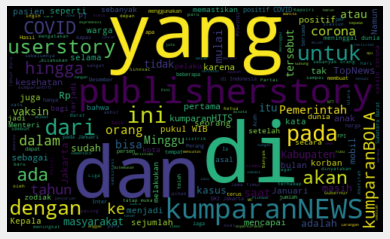

In [45]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [46]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Tercatat ada 150 ribu dosis vaksin Pfizer di J...,0.0,0.0,Neutral
1,Pemerintah dan Kapolri meminta masyarakat tida...,0.0,0.0,Neutral
2,Tokoh masyarakat terpilih atau tokoh kesehatan...,0.0,0.0,Neutral
3,Satgas Pamtas Yonif RK 744/SBY menggagalkan pe...,0.0,0.0,Neutral
4,Keterisian tempat tidur isolasi harian (ruang ...,0.0,0.0,Neutral
...,...,...,...,...
195,PPNI Jatim mencatat per 3 Januari 2021 sebanya...,0.0,0.0,Neutral
196,Gubernur Jawa Timur Khofifah Indar Parawansa p...,0.0,0.0,Neutral
197,Hasil Pilpres AS yang telah menempatkan sebag...,0.0,0.0,Neutral
198,Hotman Paris minta pemerintah izinkan swasta u...,0.0,0.0,Neutral


In [47]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Selain dikenal sebagai perang yang paling brutal dalam sejarah, Perang Dunia II juga menyimpan banyak peristiwa unik yang bahkan terkesan konyol. userstory 



In [48]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1) Link live streaming laga Newcastle United vs Leicester City bisa diakses di artikel ini. kumparanBOLA 

2) Momen Adelia Pasha dan Pasha Ungu main TikTok bersama diunggah di akun Instagram milik Adelia.kumparanHITS 

3) Cek informasi Live Streaming Inter vs Crotone di Liga Italia di sini. kumparanBOLA 

4) Sejumlah produsen tahu dan tempe di Jabodetabek menggelar aksi mogok berproduksi sebagai protes dari naiknya harga kedelai di pasaran yang mencapai Rp 9.000 per kilogram dari harga normal Rp 7.000 per kilogram. TopNews  

5) New South Wales, Australia, mewajibkan warganya untuk menggunakan masker mulai Minggu (3/1). kumparanNEWS 



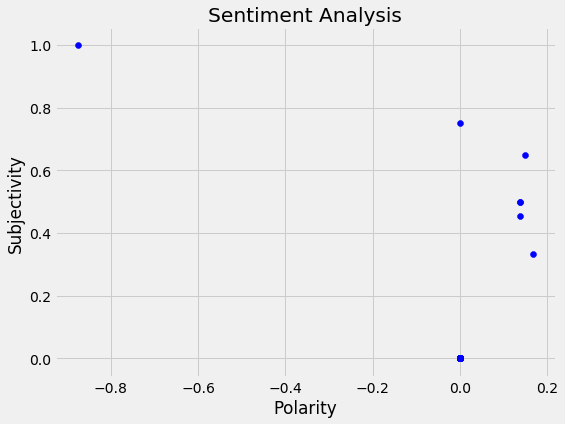

In [49]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [50]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

2.5

In [51]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     194
Positive      5
Negative      1
Name: Analysis, dtype: int64

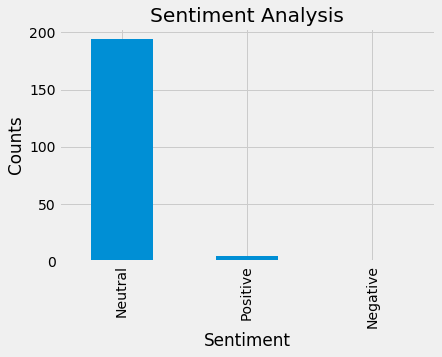

In [52]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

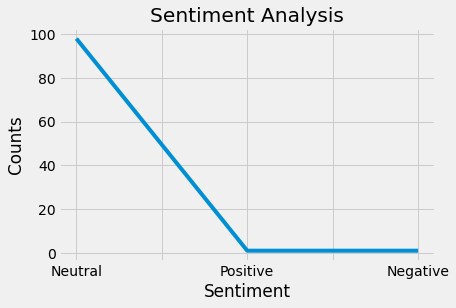

In [54]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()